# 2211CS010334
# M.NandhuVardhan
# Monthly Indigenous Crude Oil Production

## DATASET DESCRIPTION:

Crude oil production plays a vital role in the global economy, influencing energy markets, trade balances, and national revenues. The provided dataset contains detailed information on crude oil production across various companies over multiple years. This essay explores the structure of the dataset, its key features, and potential avenues for analysis, providing insights into production trends, company performance, and industry patterns.

In [216]:
import pandas as pd
df = pd.read_csv("Crude Oil Production.csv")
df


,Month,Year,Company Name,Quantity (000 Metric Tonnes),last_updated
0,April,2023,ONGC,1.51,NaN
1,April,2023,Total crude oil,2.26,NaN
2,April,2023,Total ( Crude oil + Condensate),2.38,NaN
3,May,2023,Total ( Crude oil + Condensate),2.50,NaN
4,June,2023,ONGC,1.50,NaN
...,...,...,...,...,...
163,November,2022,PSU total (Crude Oil),1.77,NaN
164,November,2022,Total crude oil,2.29,NaN
165,January,2023,OIL,0.27,NaN
166,February,2023,PSU total (Crude Oil),1.61,NaN


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         168 non-null    object 
 1   Year                          168 non-null    int64  
 2   Company Name                  168 non-null    object 
 3   Quantity (000 Metric Tonnes)  168 non-null    float64
 4   last_updated                  0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.7+ KB


In [218]:
df.dropna(axis=1, thresh=len(df) * 0.5, inplace=True)

In [219]:
df = df.ffill()

In [220]:
df.drop_duplicates(inplace=True)

In [221]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [222]:
print(df.dtypes)

month                            object
year                              int64
company_name                     object
quantity_(000_metric_tonnes)    float64
dtype: object


C:\Users\nandu\AppData\Local\Temp\ipykernel_6288\1378160498.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Year'], palette='coolwarm')


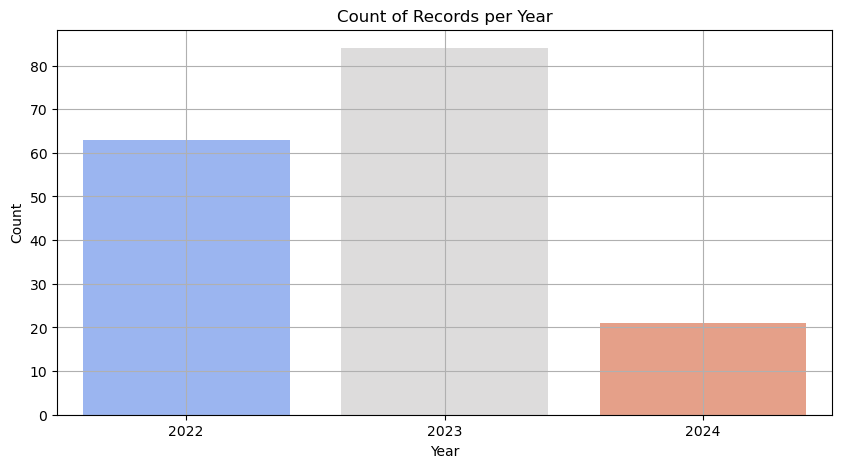

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Crude Oil Production.csv" 
df = pd.read_csv(file_path)

if 'Year' not in df.columns:
 raise ValueError("Dataset is missing the 'Year' column.")

plt.figure(figsize=(10, 5))
sns.countplot(x=df['Year'], palette='coolwarm')
plt.title('Count of Records per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.show()


C:\Users\nandu\AppData\Local\Temp\ipykernel_6288\4011989732.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Month'], palette='Blues')


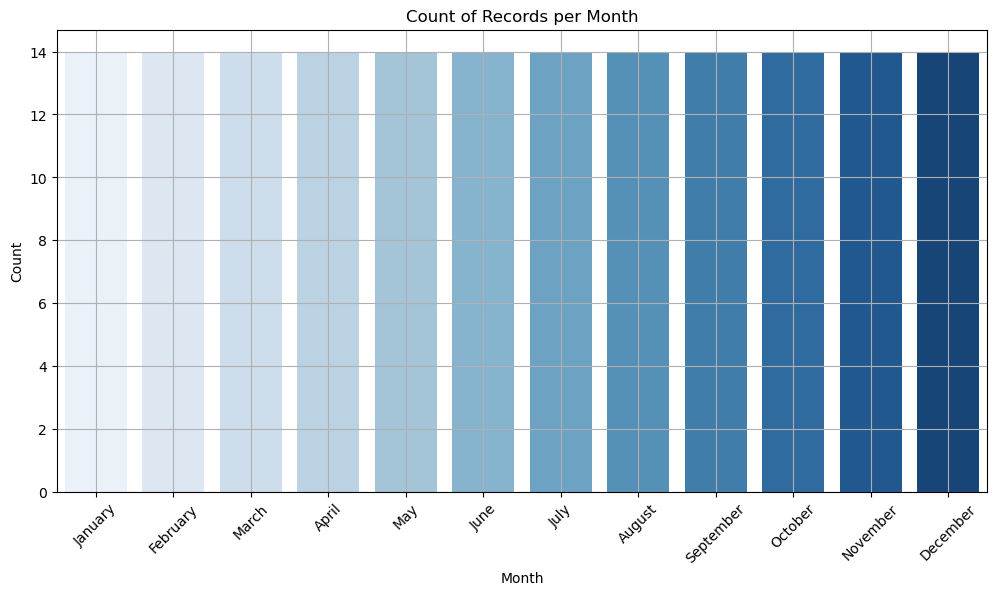

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Crude Oil Production.csv" 
df = pd.read_csv(file_path)

if 'Month' not in df.columns:
 raise ValueError("Dataset is missing the 'Month' column.")

df['Month'] = pd.Categorical(df['Month'], categories=[
 'January', 'February', 'March', 'April', 'May', 'June',
 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Month'], palette='Blues')
plt.title('Count of Records per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()




C:\Users\nandu\AppData\Local\Temp\ipykernel_6288\993057364.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Company Name'], palette='viridis', order=df['Company Name'])


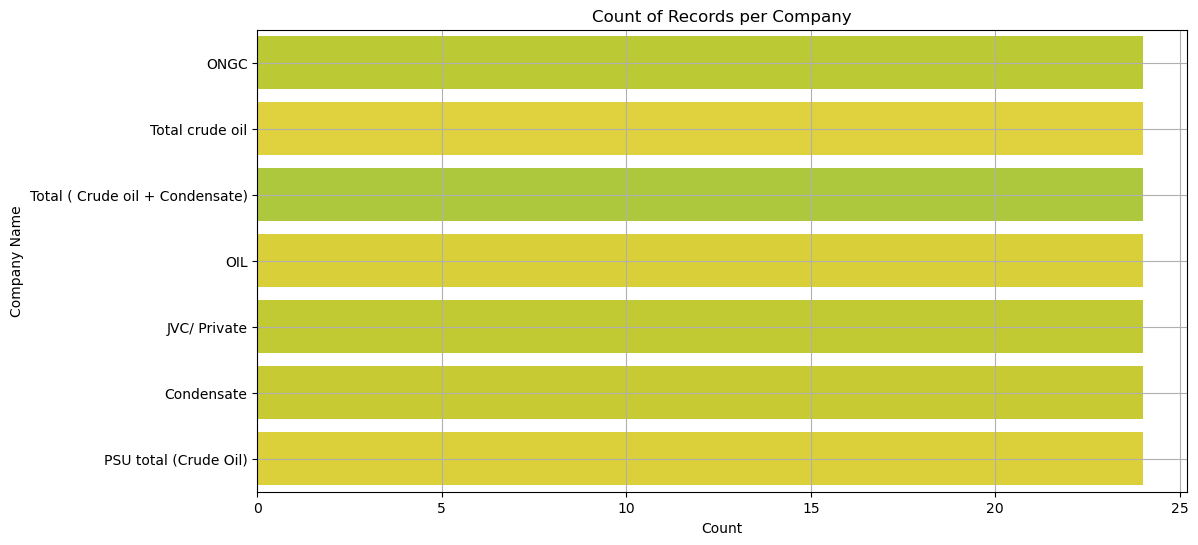

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
file_path = "Crude Oil Production.csv" # Update with the correct path
df = pd.read_csv(file_path)
# Ensure 'Company Name' column exists
if 'Company Name' not in df.columns:
 raise ValueError("Dataset is missing the 'Company Name' column.")
# Plot count of records per company
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Company Name'], palette='viridis', order=df['Company Name'])
plt.title('Count of Records per Company')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.grid()
plt.show()


# Cleaning the Dataset

In [227]:

df_clean = df.drop('last_updated', axis=1)


df_clean['Date'] = pd.to_datetime(df_clean['Month'] + ' ' + df_clean['Year'].astype(str))


df_clean = df_clean.sort_values('Date')


C:\Users\nandu\AppData\Local\Temp\ipykernel_6288\32645932.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Date'] = pd.to_datetime(df_clean['Month'] + ' ' + df_clean['Year'].astype(str))


# Plotting Crude Oil Production Over Time

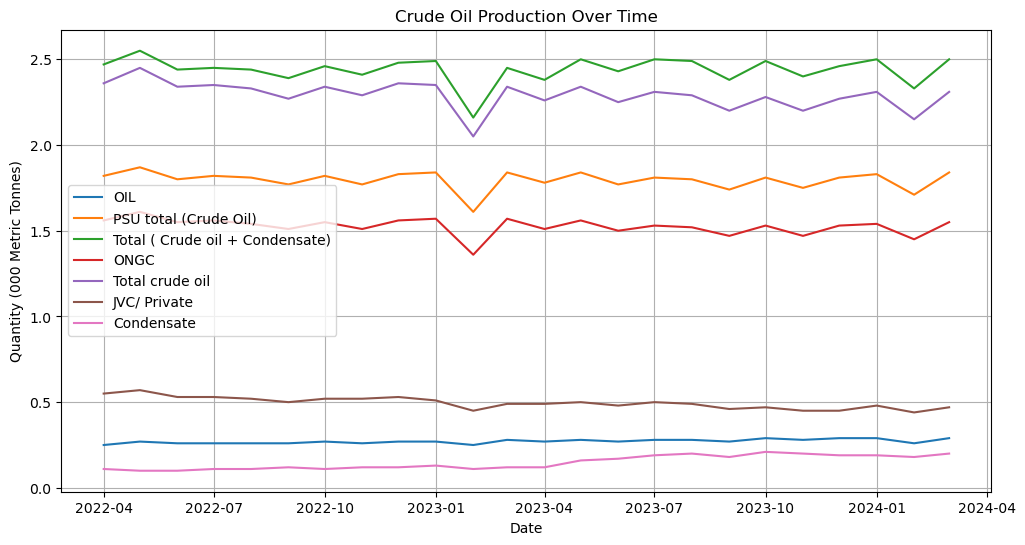

In [229]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
for company in df_clean['Company Name'].unique():
    company_data = df_clean[df_clean['Company Name'] == company]
    plt.plot(company_data['Date'], company_data['Quantity (000 Metric Tonnes)'], label=company)

plt.title('Crude Oil Production Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.legend()
plt.grid(True)
plt.show()


# Company-wise Production Comparison

C:\Users\nandu\AppData\Local\Temp\ipykernel_6288\2811219383.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_production, x='Company Name', y='Quantity (000 Metric Tonnes)', palette='viridis')


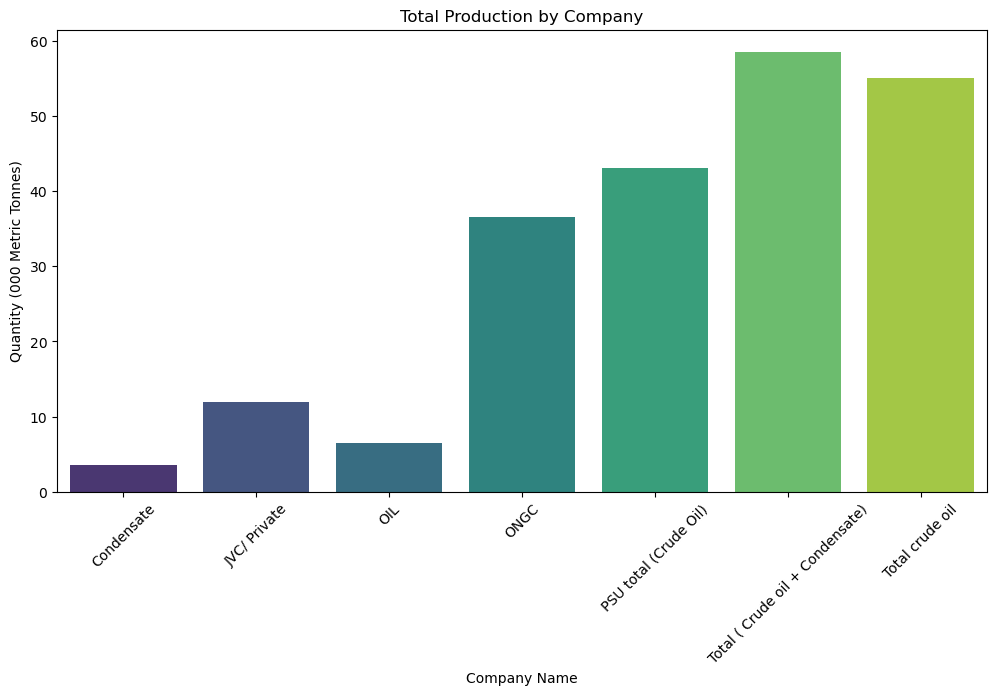

In [231]:
import seaborn as sns

company_production = df_clean.groupby('Company Name')['Quantity (000 Metric Tonnes)'].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=company_production, x='Company Name', y='Quantity (000 Metric Tonnes)', palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Production by Company')
plt.show()


# Monthly Production Trend

C:\Users\nandu\AppData\Local\Temp\ipykernel_6288\2881132571.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = df_clean.groupby(['Year', 'Month_Ordered'])['Quantity (000 Metric Tonnes)'].sum().reset_index()


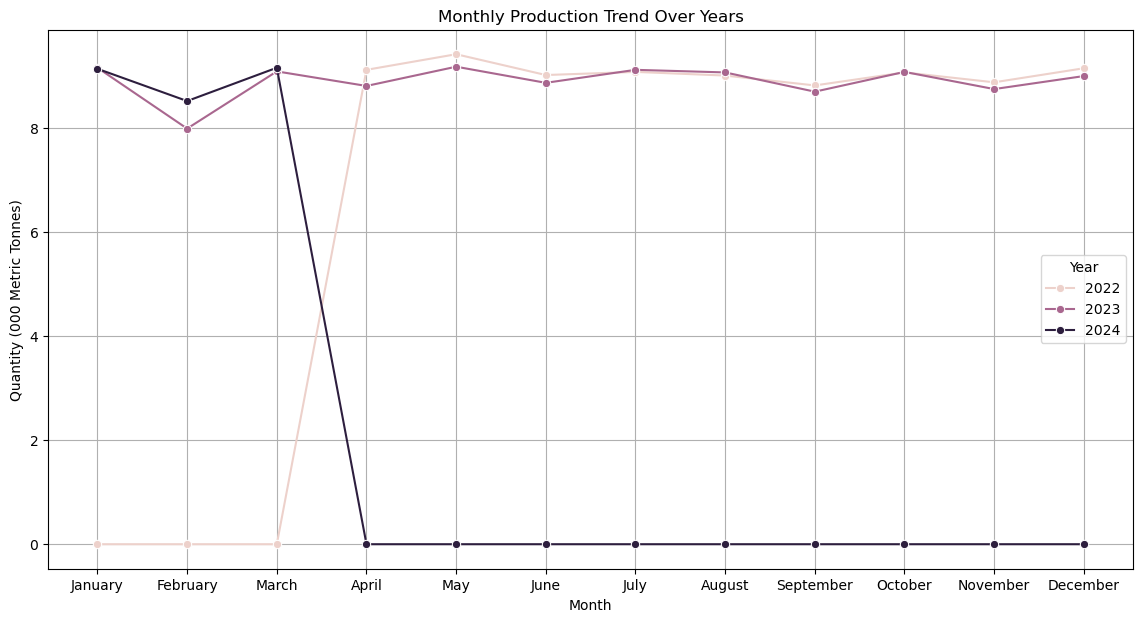

In [233]:

df_clean['Month_Ordered'] = pd.Categorical(df_clean['Month'], 
                                           categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                       'July', 'August', 'September', 'October', 'November', 'December'],
                                           ordered=True)


monthly_trend = df_clean.groupby(['Year', 'Month_Ordered'])['Quantity (000 Metric Tonnes)'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_trend, x='Month_Ordered', y='Quantity (000 Metric Tonnes)', hue='Year', marker='o')
plt.title('Monthly Production Trend Over Years')
plt.xlabel('Month')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.legend(title='Year')
plt.grid(True)
plt.show()


# Yearly Production Trend by Company

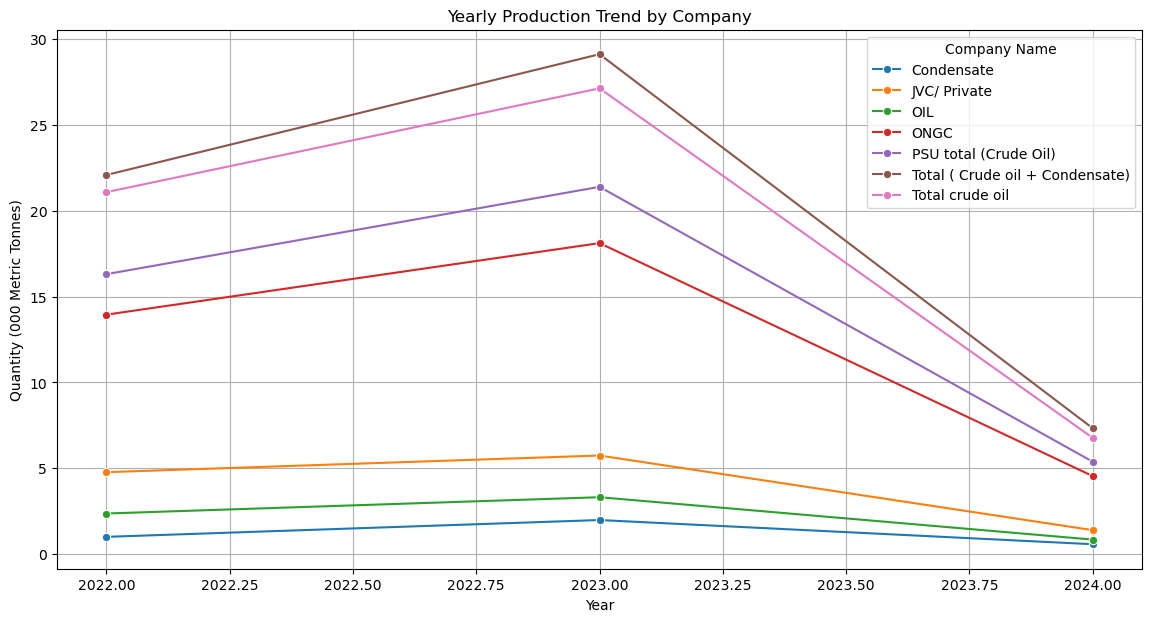

In [235]:

yearly_trend = df_clean.groupby(['Year', 'Company Name'])['Quantity (000 Metric Tonnes)'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_trend, x='Year', y='Quantity (000 Metric Tonnes)', hue='Company Name', marker='o')
plt.title('Yearly Production Trend by Company')
plt.xlabel('Year')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.legend(title='Company Name')
plt.grid(True)
plt.show()


# Distribution of Production Quantities

C:\Users\nandu\AppData\Local\Temp\ipykernel_6288\256643789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Company Name', y='Quantity (000 Metric Tonnes)', palette='Set2')


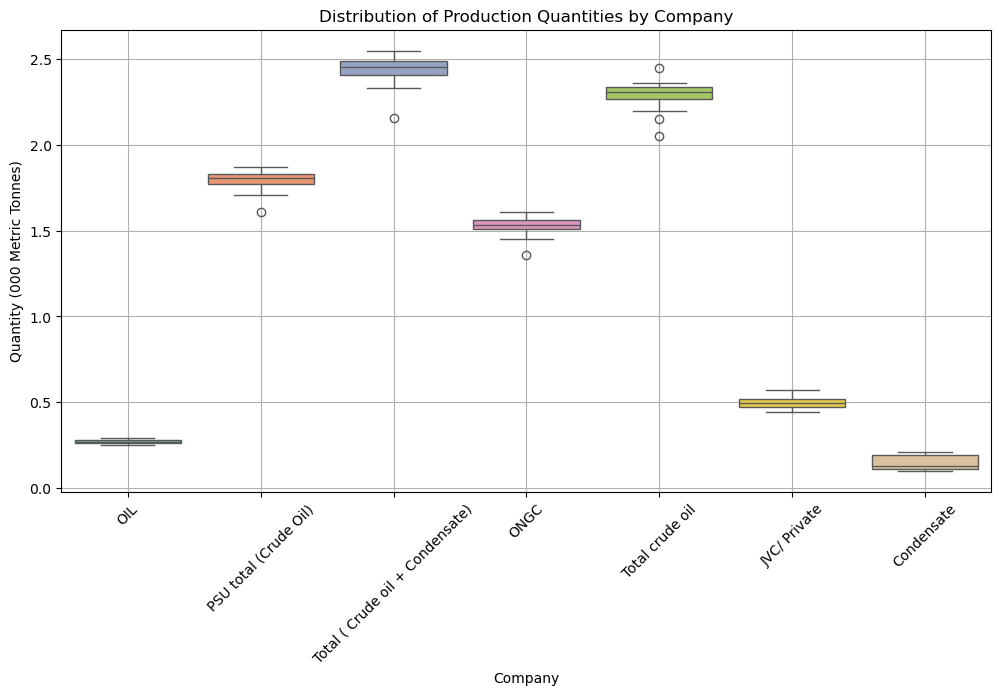

In [237]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Company Name', y='Quantity (000 Metric Tonnes)', palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribution of Production Quantities by Company')
plt.xlabel('Company')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.grid(True)
plt.show()


# Heatmap of Production Over Time

C:\Users\nandu\AppData\Local\Temp\ipykernel_6288\798606449.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_clean.pivot_table(index='Year', columns='Month_Ordered', values='Quantity (000 Metric Tonnes)', aggfunc='sum')


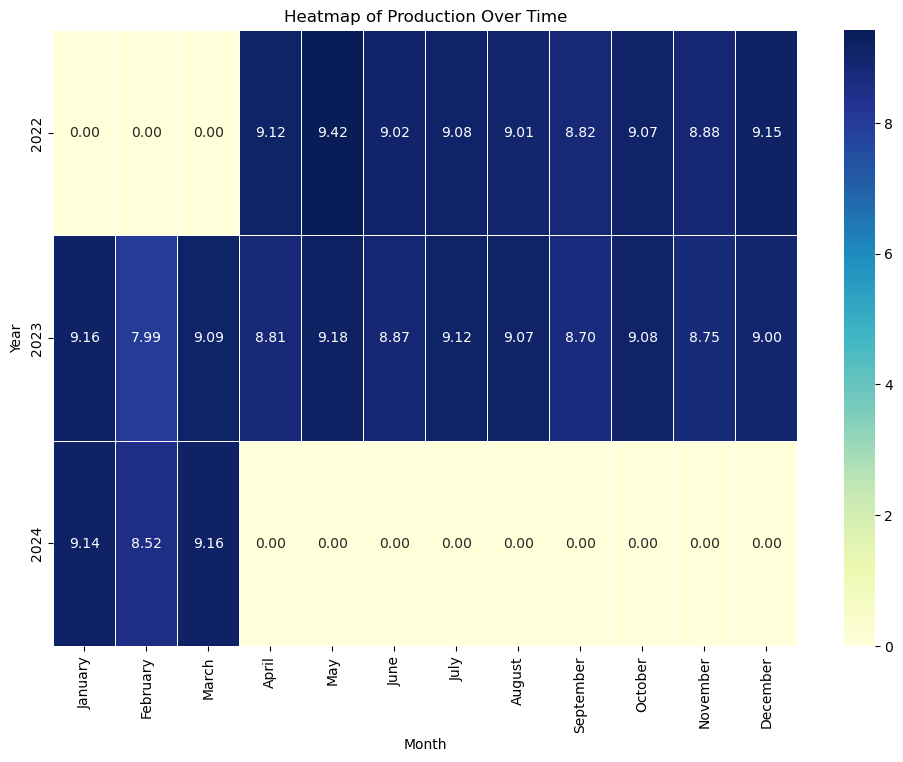

In [239]:

heatmap_data = df_clean.pivot_table(index='Year', columns='Month_Ordered', values='Quantity (000 Metric Tonnes)', aggfunc='sum')


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Production Over Time')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


# Pie Chart of Production Share by Company

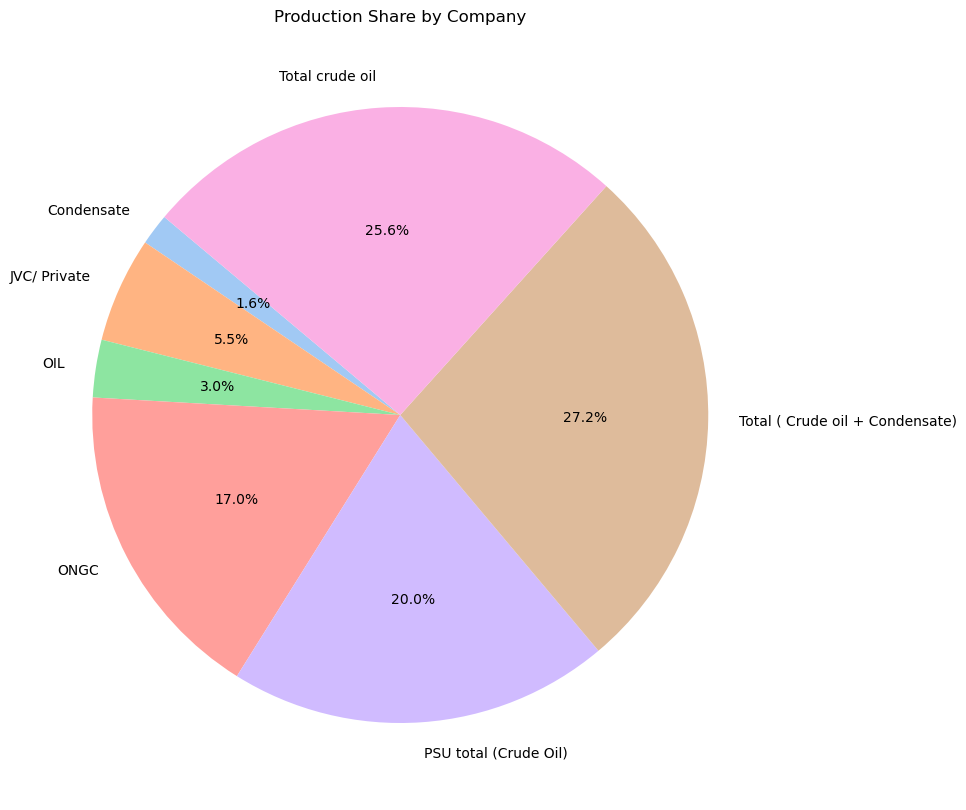

In [241]:
company_share = df_clean.groupby('Company Name')['Quantity (000 Metric Tonnes)'].sum()

plt.figure(figsize=(10, 10))
plt.pie(company_share, labels=company_share.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Production Share by Company')
plt.show()


# Stacked Area Chart for Production Over Time

<Figure size 1400x700 with 0 Axes>

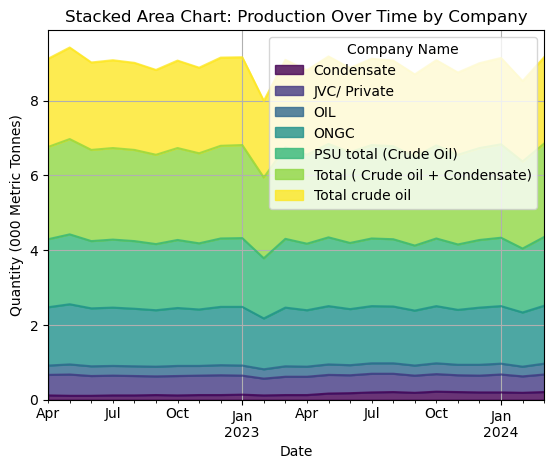

In [243]:

area_df = df_clean.pivot_table(index='Date', columns='Company Name', values='Quantity (000 Metric Tonnes)', aggfunc='sum').fillna(0)


plt.figure(figsize=(14, 7))
area_df.plot(kind='area', stacked=True, colormap='viridis', alpha=0.8)
plt.title('Stacked Area Chart: Production Over Time by Company')
plt.xlabel('Date')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.grid(True)
plt.legend(title='Company Name')
plt.show()


# Production Volatility Over Time

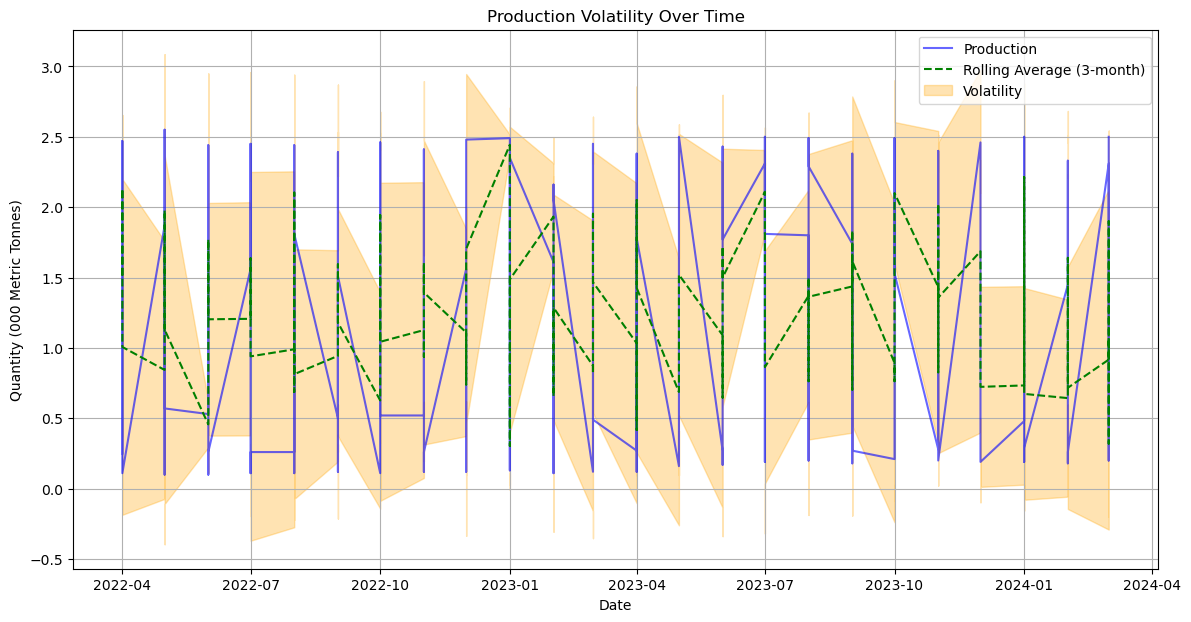

In [245]:

df_clean['Rolling_Avg'] = df_clean['Quantity (000 Metric Tonnes)'].rolling(window=3).mean()
df_clean['Volatility'] = df_clean['Quantity (000 Metric Tonnes)'].rolling(window=3).std()


fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df_clean['Date'], df_clean['Quantity (000 Metric Tonnes)'], label='Production', color='blue', alpha=0.6)
ax.plot(df_clean['Date'], df_clean['Rolling_Avg'], label='Rolling Average (3-month)', color='green', linestyle='--')
ax.fill_between(df_clean['Date'], 
                df_clean['Rolling_Avg'] - df_clean['Volatility'], 
                df_clean['Rolling_Avg'] + df_clean['Volatility'], 
                color='orange', alpha=0.3, label='Volatility')

ax.set_title('Production Volatility Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Quantity (000 Metric Tonnes)')
ax.legend()
plt.grid(True)
plt.show()


# Correlation Heatmap

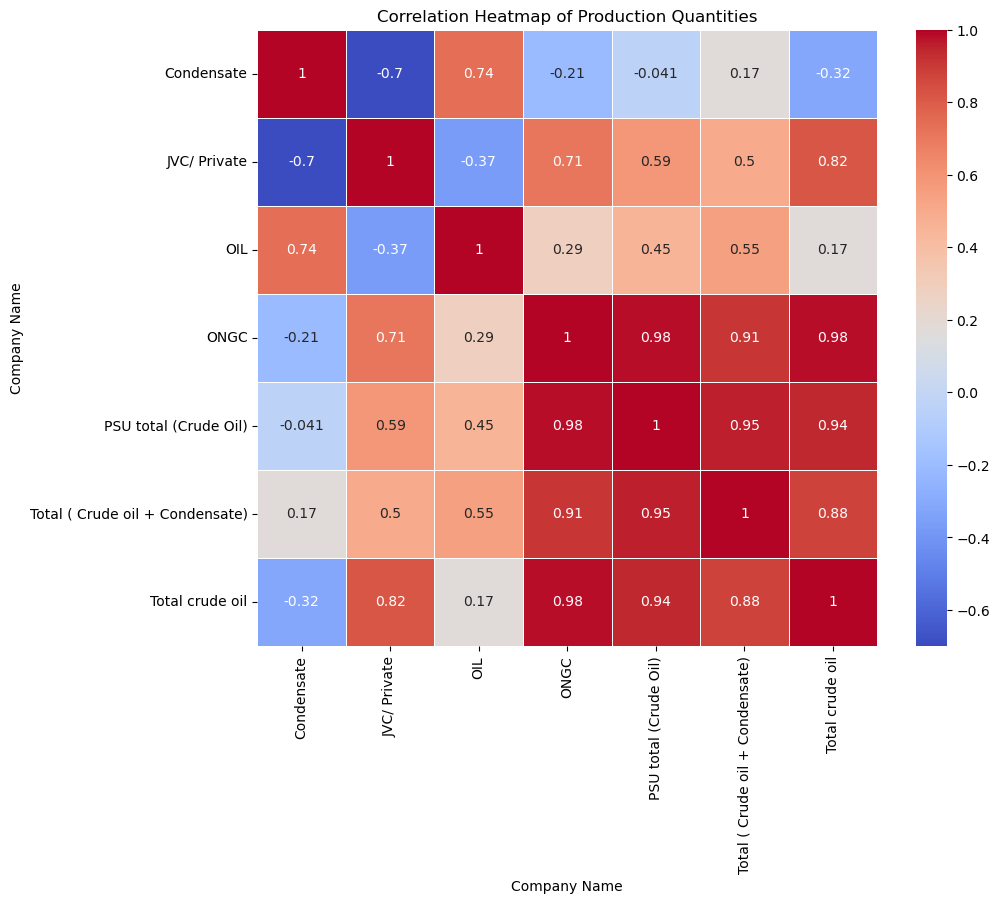

In [247]:

corr_df = df_clean.pivot_table(index='Date', columns='Company Name', values='Quantity (000 Metric Tonnes)', aggfunc='sum').fillna(0)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Production Quantities')
plt.show()


# Production Growth Rate Over Time

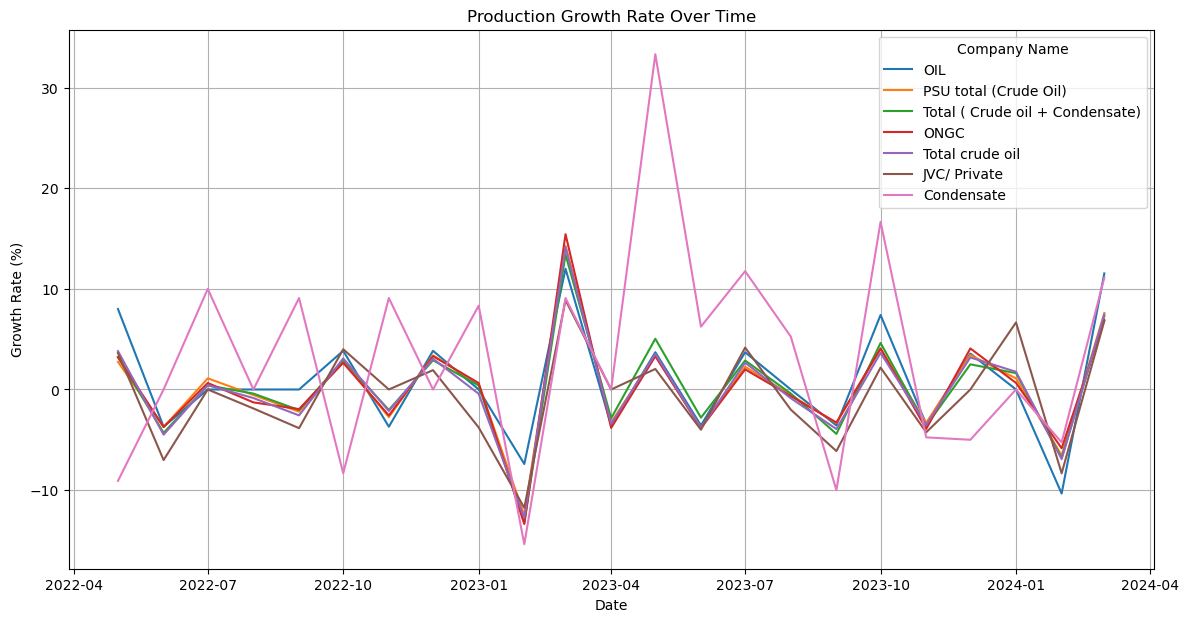

In [249]:

df_clean['Growth_Rate'] = df_clean.groupby('Company Name')['Quantity (000 Metric Tonnes)'].pct_change() * 100


plt.figure(figsize=(14, 7))
for company in df_clean['Company Name'].unique():
    company_data = df_clean[df_clean['Company Name'] == company]
    plt.plot(company_data['Date'], company_data['Growth_Rate'], label=company)

plt.title('Production Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.legend(title='Company Name')
plt.grid(True)
plt.show()


#  KDE Plot for Production Distribution

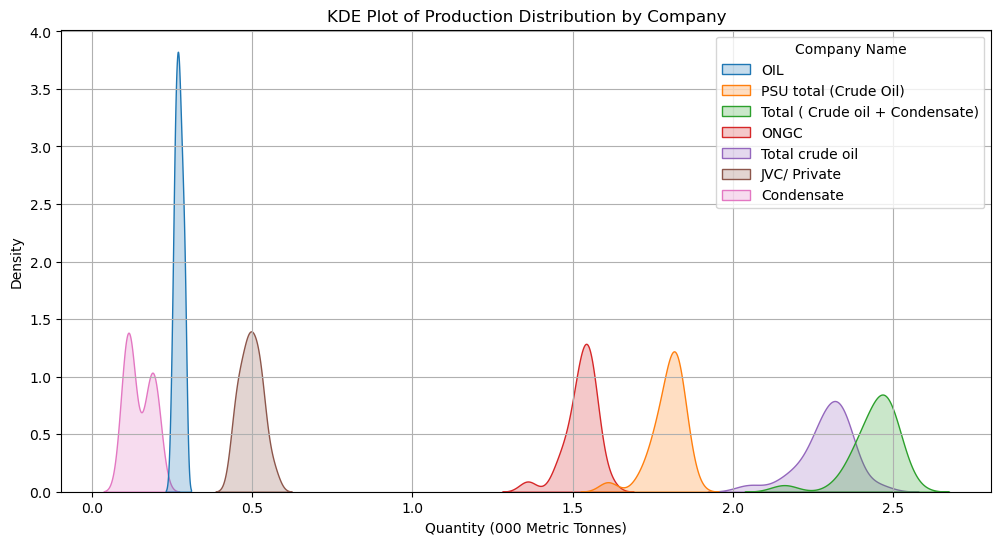

In [251]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_clean, x='Quantity (000 Metric Tonnes)', hue='Company Name', fill=True)
plt.title('KDE Plot of Production Distribution by Company')
plt.xlabel('Quantity (000 Metric Tonnes)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


# Bubble Chart for Production Analysis

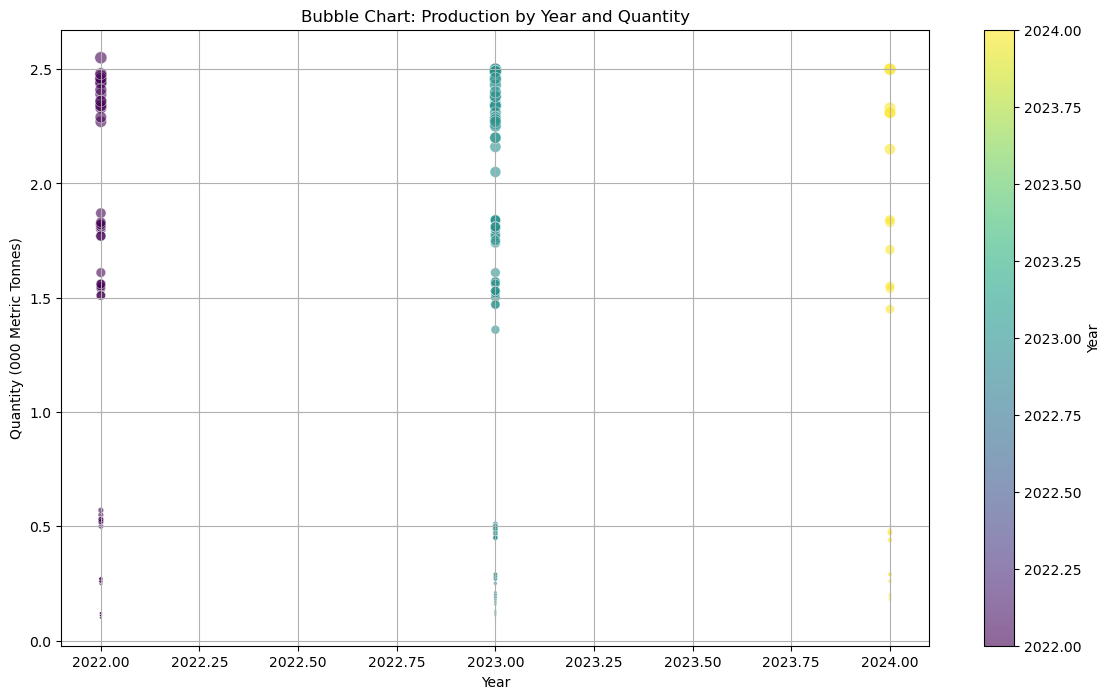

In [253]:
plt.figure(figsize=(14, 8))
bubble = plt.scatter(df_clean['Year'], 
                     df_clean['Quantity (000 Metric Tonnes)'], 
                     s=df_clean['Quantity (000 Metric Tonnes)'] * 30,  # Bubble size
                     c=df_clean['Year'], 
                     cmap='viridis', 
                     alpha=0.6, 
                     edgecolors='w', 
                     linewidth=0.5)

plt.colorbar(bubble, label='Year')
plt.title('Bubble Chart: Production by Year and Quantity')
plt.xlabel('Year')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.grid(True)
plt.show()


# Parallel Coordinates Plot

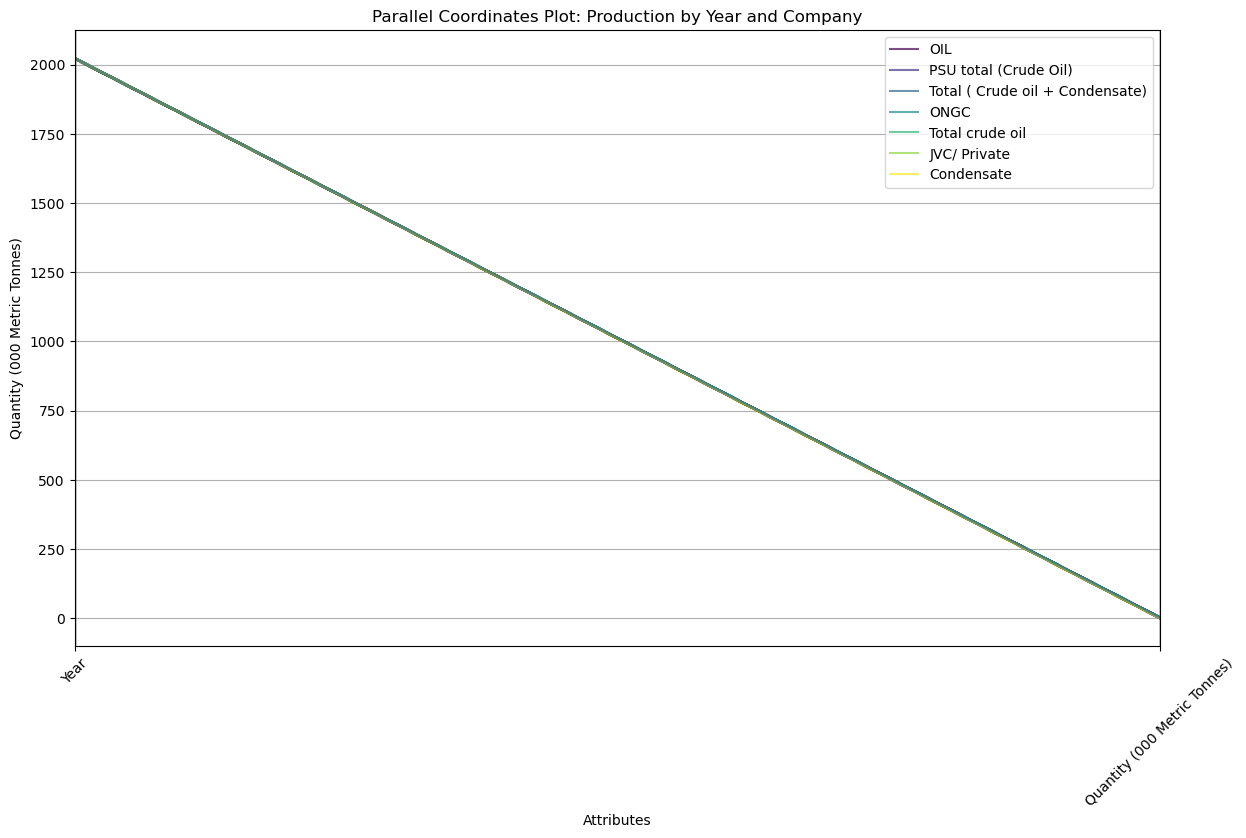

In [255]:
from pandas.plotting import parallel_coordinates


parallel_df = df_clean[['Year', 'Company Name', 'Quantity (000 Metric Tonnes)']]


plt.figure(figsize=(14, 8))
parallel_coordinates(parallel_df, class_column='Company Name', colormap='viridis', alpha=0.7)
plt.title('Parallel Coordinates Plot: Production by Year and Company')
plt.xlabel('Attributes')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#  Radar Chart (Spider Plot)

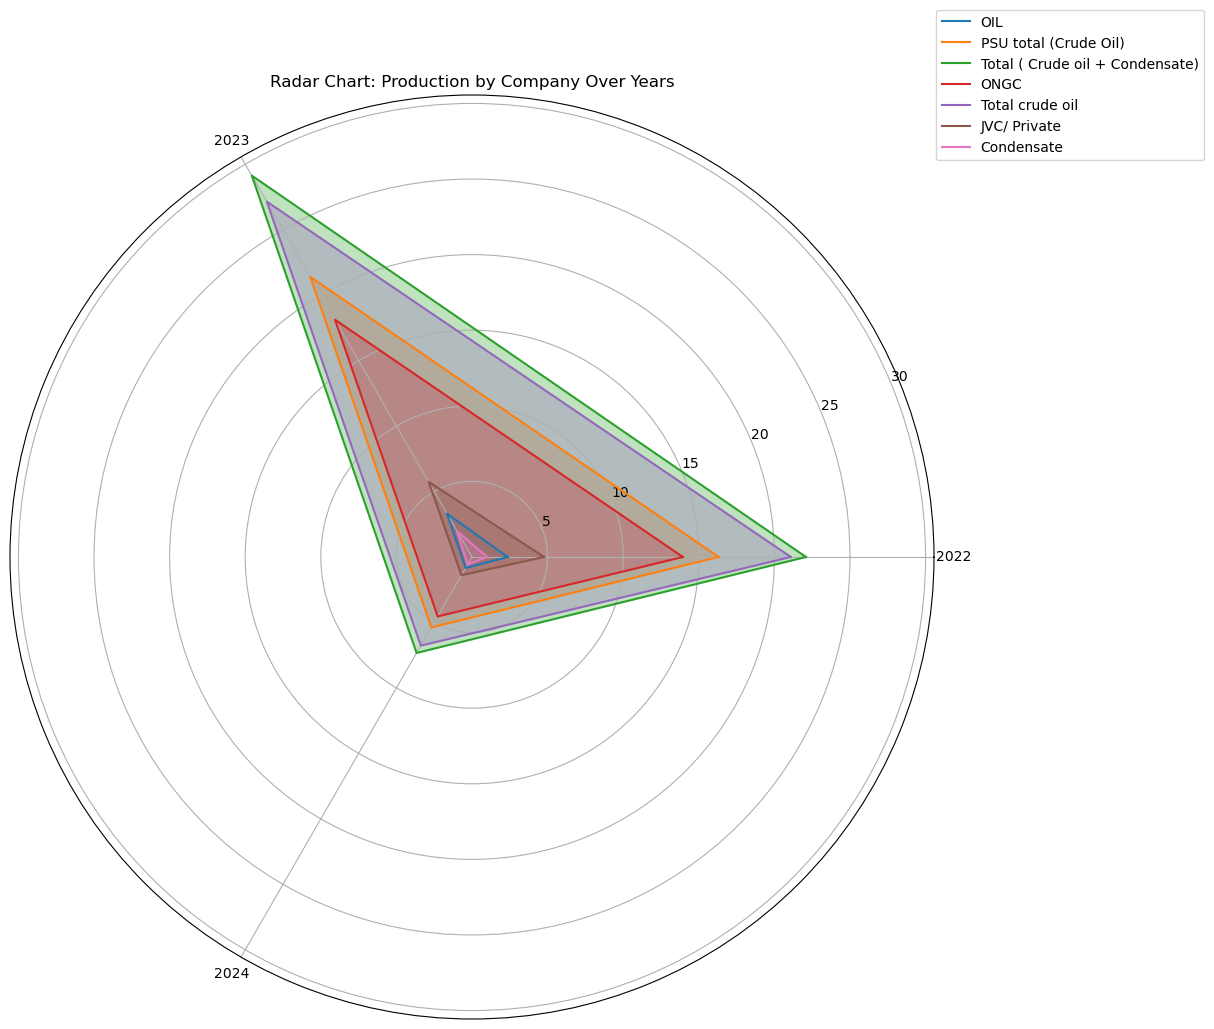

In [257]:
import numpy as np

companies = df_clean['Company Name'].unique()
years = df_clean['Year'].unique()


radar_data = df_clean.groupby(['Company Name', 'Year'])['Quantity (000 Metric Tonnes)'].sum().unstack().fillna(0)


fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})
angles = np.linspace(0, 2 * np.pi, len(years), endpoint=False).tolist()

for company in companies:
    values = radar_data.loc[company].tolist()
    values += values[:1]  # To close the circle
    ax.plot(angles + [angles[0]], values, label=company)
    ax.fill(angles + [angles[0]], values, alpha=0.3)

ax.set_xticks(angles)
ax.set_xticklabels(years)
ax.set_title('Radar Chart: Production by Company Over Years')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


# Violin Plot

C:\Users\nandu\AppData\Local\Temp\ipykernel_6288\3600014251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='Company Name', y='Quantity (000 Metric Tonnes)', palette='coolwarm')


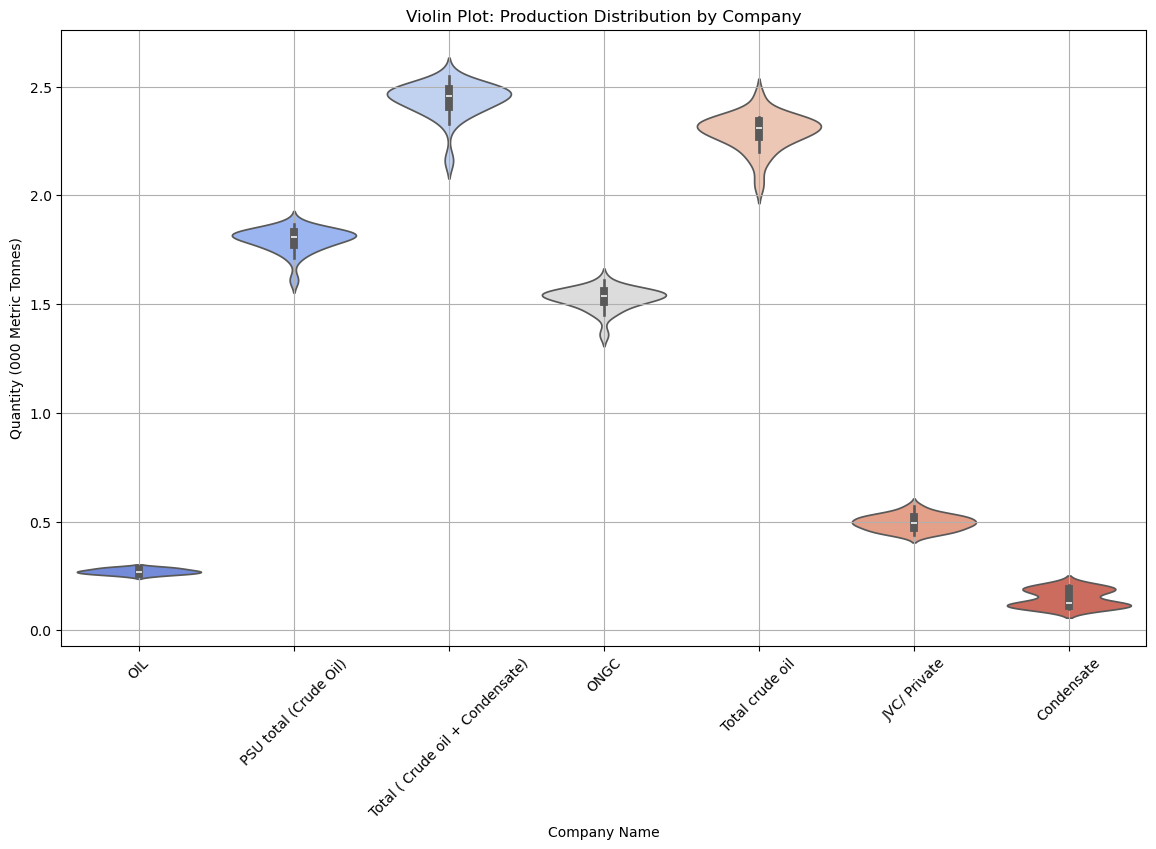

In [259]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_clean, x='Company Name', y='Quantity (000 Metric Tonnes)', palette='coolwarm')
plt.title('Violin Plot: Production Distribution by Company')
plt.xlabel('Company Name')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Strip Plot

C:\Users\nandu\AppData\Local\Temp\ipykernel_6288\898679932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_clean, x='Company Name', y='Quantity (000 Metric Tonnes)', jitter=True, alpha=0.7, palette='muted')


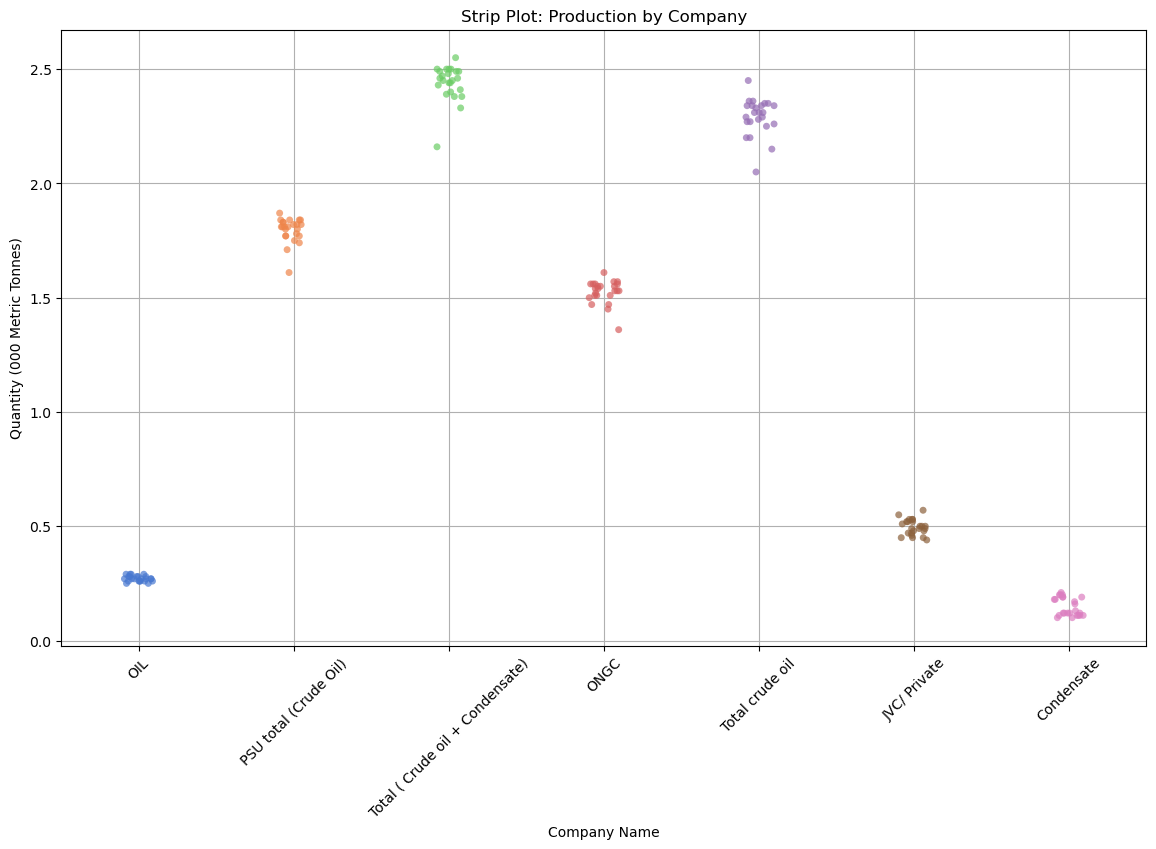

In [261]:
plt.figure(figsize=(14, 8))
sns.stripplot(data=df_clean, x='Company Name', y='Quantity (000 Metric Tonnes)', jitter=True, alpha=0.7, palette='muted')
plt.title('Strip Plot: Production by Company')
plt.xlabel('Company Name')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Density Plot with Shading

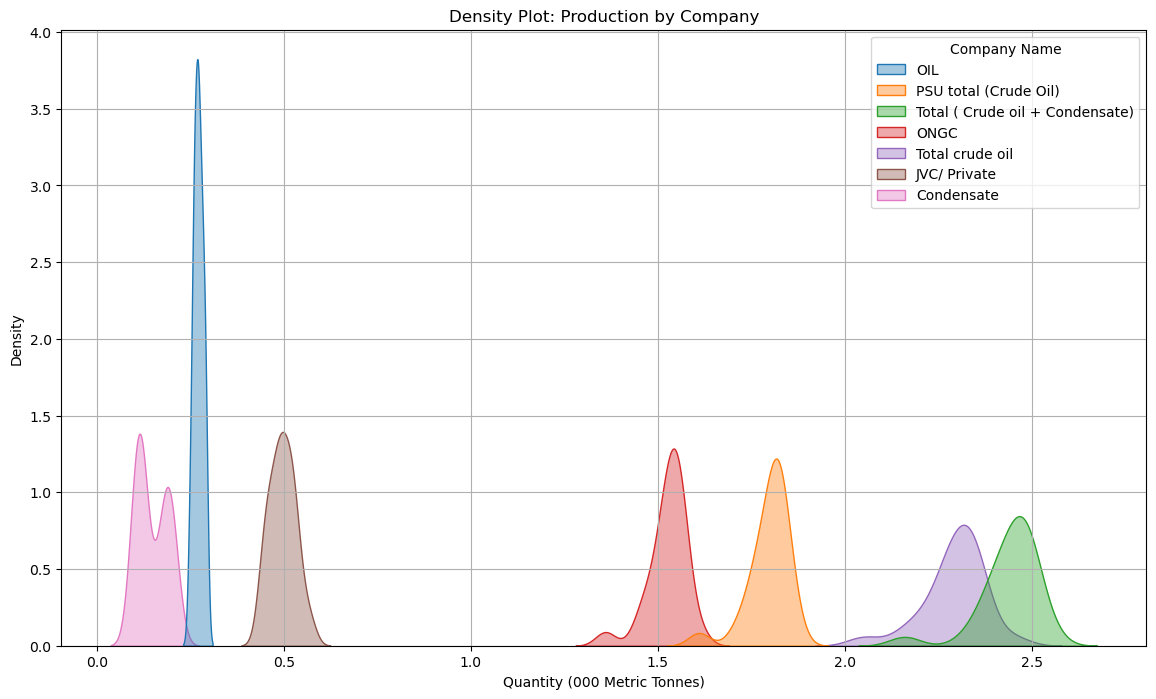

In [263]:
plt.figure(figsize=(14, 8))
sns.kdeplot(data=df_clean, x='Quantity (000 Metric Tonnes)', hue='Company Name', fill=True, alpha=0.4)
plt.title('Density Plot: Production by Company')
plt.xlabel('Quantity (000 Metric Tonnes)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


# Swarm Plot

C:\Users\nandu\AppData\Local\Temp\ipykernel_6288\707099655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_clean, x='Company Name', y='Quantity (000 Metric Tonnes)', palette='tab20', size=6)
C:\Users\nandu\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


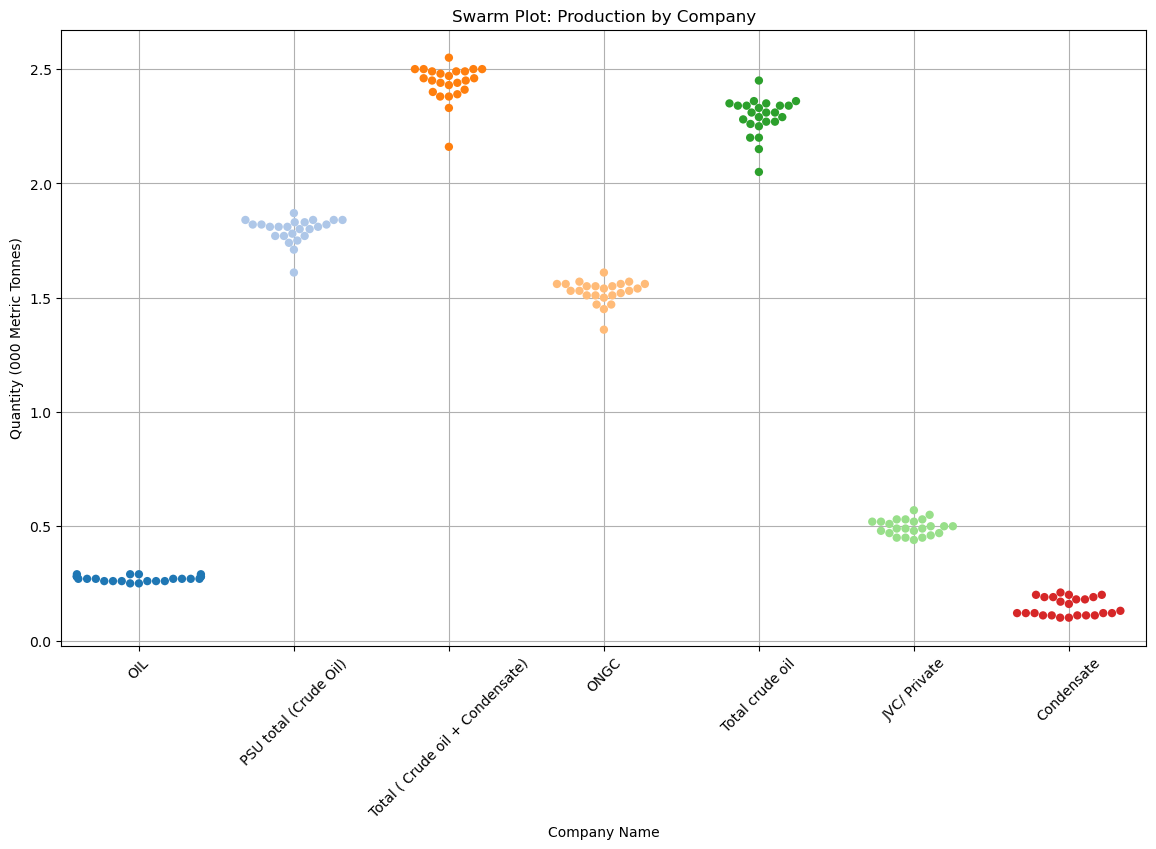

In [265]:
plt.figure(figsize=(14, 8))
sns.swarmplot(data=df_clean, x='Company Name', y='Quantity (000 Metric Tonnes)', palette='tab20', size=6)
plt.title('Swarm Plot: Production by Company')
plt.xlabel('Company Name')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Step Chart

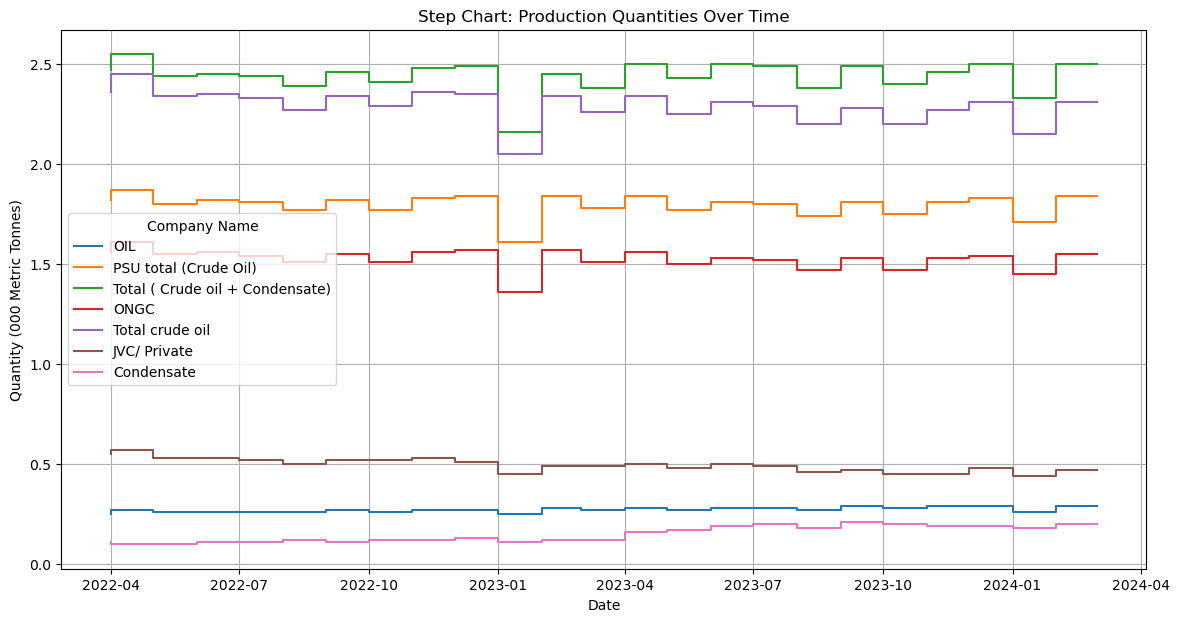

In [267]:
plt.figure(figsize=(14, 7))
for company in df_clean['Company Name'].unique():
    company_data = df_clean[df_clean['Company Name'] == company]
    plt.step(company_data['Date'], company_data['Quantity (000 Metric Tonnes)'], label=company)

plt.title('Step Chart: Production Quantities Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.legend(title='Company Name')
plt.grid(True)
plt.show()


# Histogram with Kernel Density Estimation (KDE)

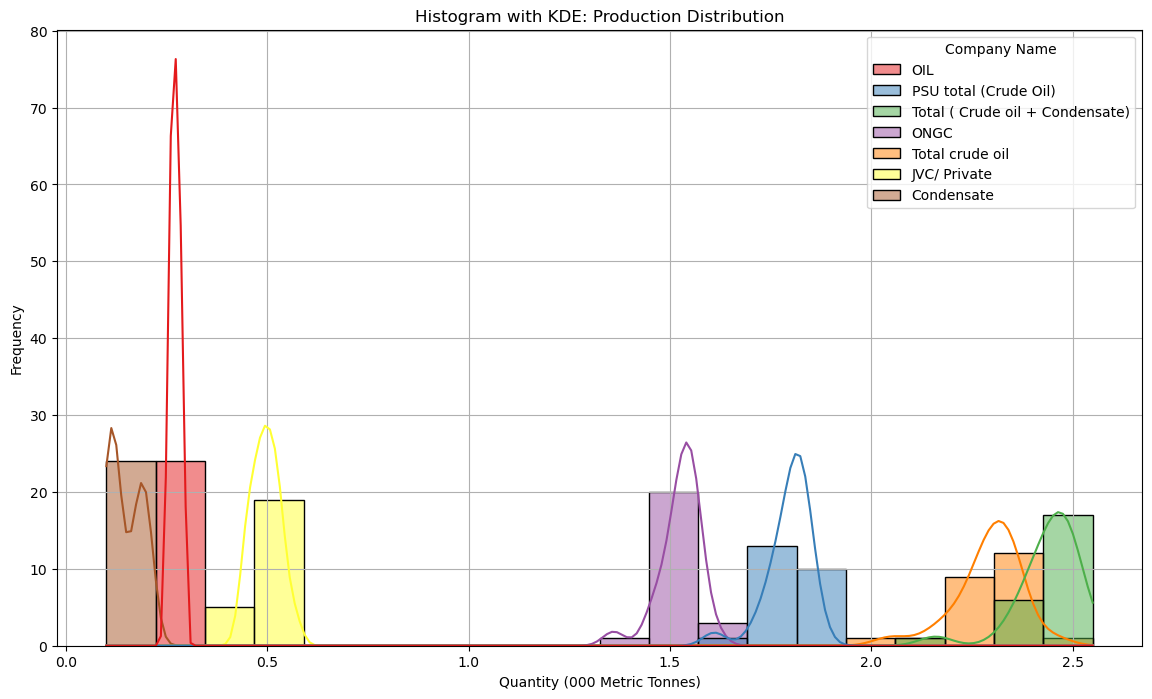

In [269]:
plt.figure(figsize=(14, 8))
sns.histplot(data=df_clean, x='Quantity (000 Metric Tonnes)', hue='Company Name', kde=True, bins=20, palette='Set1')
plt.title('Histogram with KDE: Production Distribution')
plt.xlabel('Quantity (000 Metric Tonnes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## OBSERVATION ON THE DATASET:

The crude oil production dataset offers valuable insights into the oil industry's monthly production volumes across multiple years. Crude oil is a key component of the global energy market, and analyzing its production patterns can reveal industry trends, company performance, and operational fluctuations. This essay presents a detailed observation of the dataset, highlighting production trends, company-wise performance, missing data issues, and potential insights for further analysis.

## Visualizations:

### Count of Records per Year and Month::
    Visualizations show the number of records per year and month, indicating how the data is distributed over time.

##  Production Over Time
### Time-Series Line Plot:

Plots crude oil production over time by company, showing production trends and variations.

Reveals seasonal patterns and company-specific fluctuations.

## Company-Wise Production
### Barplot and Pie Chart:

Shows the total production by each company.

Pie chart displays the percentage contribution of each company to the overall production.

Helps identify dominant and smaller producers

## Monthly and Yearly Trends
### Line and Heatmap Plots:

Line plots show monthly production trends over multiple years.

Heatmap visualizes production across years and months, highlighting high and low production periods.

Useful for detecting seasonality and yearly growth patterns.

## Production Volatility
#### Rolling Average and Volatility:

A rolling average with a 3-month window shows the smoothed production trend.

Volatility bands highlight periods of instability or fluctuation.

## Correlation Analysis
### Heatmap of Correlations:

Displays correlations between companies' production quantities.

Identifies companies with similar or opposing production trends.

## Growth Rate
### Growth Rate Over Time:

Calculates and visualizes the percentage growth rate for each company.

Helps detect companies with rapid growth or decline.

 ## Distribution Analysis
### Boxplot, Violin Plot, and KDE:

These plots show the distribution of production quantities by company.

Helps identify outliers, spread, and density patterns.